## Main Statistical Test: X^2GOF for Forest Fires

Hello! This is a data analysis project to analyze what factors contribute to forest fires. We will be using a **chi squared test for goodness of fit** since we are checking if the distribution of fires matches our expectations for them. We set our null hypothesis that there would be no major difference and our alternative hypothesis that they will differ by month. Specifically, we are looking for a greater area in summer and lower area in colder months.

Our parameter of interest is the **average log affected fire area in Portugal per month** and specifically we are interested in the distribution of this variable by month.

**Ho : the distribution of forest fires in Portugal will be nearly evenly distributed by month.**
**Ha : the distribution of forest fires in Portugal will NOT match an even distribution by month.**

We will have our p value cutoff be significance level **alpha = 0.05**


### Conclusions
* Chi-squared Statistic: 17.5399528101865
* P-value: 0.02495275260798357

Given that the null hypothesis is true and that the distribution of fire area across months is equal, there would be a p = 0.02495 probability of our observed distribution occuring by chance. Because p < a, we have convincing evidence to reject the null hypothesis and suggest that the observed data does not fit the expected distribution.

In [2]:
import pandas as pd
import math
import random
from scipy.stats import chisquare

Here we will import the fire dataset of forest fires from Portugal in Kaggle.
- Here is the link: https://www.kaggle.com/datasets/ishandutta/forest-fires-data-set-portugal
LETS CHECK CONDITIONS FOR OUR DATA:
- Random sample? It seems that this dataset was collected by convenience but this is because forest fires are not a very rare occurance. There is nothing to suggest a bias in sample that doesn't match population. We will also be sampling our dataset into a smaller subset of data. PROCEED WITH CAUTION.
- Normal? Should be. The time period is unspecified but given portugal gets thousands of fires a year, 517 of all fires should not be an issue.
- Large counts? Yes. Although we are targetting area rather than frequency, the number of data values per row exceeds 5 if we ignore nov, jan, and may which we remove later.

In [17]:
fire_data = pd.read_csv("../DATASETS/forestfires.csv")
fire_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Then we will group it by month to see what proportion of data is necessary from each month (stratified).

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
Number of values in dataset: 517


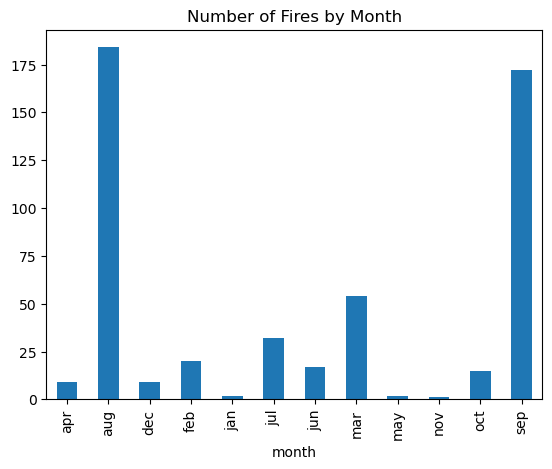

In [5]:
grouped = fire_data.groupby("month").size().plot(kind="bar", title="Number of Fires by Month")
counts = fire_data.value_counts("month")
num_data = sum(counts)
print(counts)
print("Number of values in dataset:", num_data)

We will conduct a stratified simple random sample by grabbing 60% of each strata.

In [14]:
proportions = {}
for mon in fire_data["month"].unique():
    if mon not in excluded_months:
        proportions[mon] = math.ceil(0.6 * float(counts[mon]))

observed = []
new_df = pd.DataFrame()

for mon, prop in proportions.items():
    print(mon, prop)
    month_data = fire_data[fire_data["month"] == mon]
    sampled_data = month_data.sample(n=prop, random_state=42)
    observed.append((mon,sum(sampled_data["area"])/len(sampled_data)))
    new_df = pd.concat([new_df, sampled_data], ignore_index=True)

print("New number of values in dataset:", len(new_df))
print("OBSERVED VALUES:", observed)

mar 33
oct 9
aug 111
sep 104
apr 6
jun 11
jul 20
feb 12
dec 6
New number of values in dataset: 312
OBSERVED VALUES: [('mar', 3.43030303030303), ('oct', 8.936666666666666), ('aug', 15.46009009009009), ('sep', 11.154711538461537), ('apr', 12.778333333333334), ('jun', 8.203636363636363), ('jul', 19.395999999999997), ('feb', 6.1575), ('dec', 13.603333333333333)]


Conduct X^2 Goodness of Fit Test ->
Remove jan may and nov due to undercoverage (and it is given that fires will subside in the winter)

In [13]:
excluded_months = ["jan", "may", "nov"]
included = []
for mon, val in observed:
    if mon in excluded_months:
        print(f"Excluding {mon} from observed data.")
        continue
    included.append((mon, val))
observed = [x[1] for x in included]
print(observed)

exp = sum(observed)/9

expected = [exp]*9
print(sum(expected), sum(observed))
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The observed data does not fit the expected distribution (reject null hypothesis).")
else:
    print("The observed data fits the expected distribution (fail to reject null hypothesis).")

Excluding jan from observed data.
Excluding may from observed data.
Excluding nov from observed data.
[3.43030303030303, 8.936666666666666, 15.46009009009009, 11.154711538461537, 12.778333333333334, 8.203636363636363, 19.395999999999997, 6.1575, 13.603333333333333]
99.12057435582435 99.12057435582435
Chi-squared Statistic: 17.5399528101865
P-value: 0.02495275260798357
The observed data does not fit the expected distribution (reject null hypothesis).


This shows us which months were farthest from our expected values.

mar -7.58309412034412
oct -2.0767304839804837
aug 4.44669293944294
sep 0.1413143878143881
apr 1.764936182686185
jun -2.809760787010786
jul 8.382602849352848
feb -4.8558971506471496
dec 2.589936182686184
[('jul', 2.5259121412555388), ('mar', 2.2849978522290892), ('feb', 1.4632173073134123), ('aug', 1.3399126603070943), ('jun', 0.8466593268798581), ('dec', 0.7804200397528205), ('oct', 0.6257768425718472), ('apr', 0.5318245194847099), ('sep', 0.04258196819404532)]


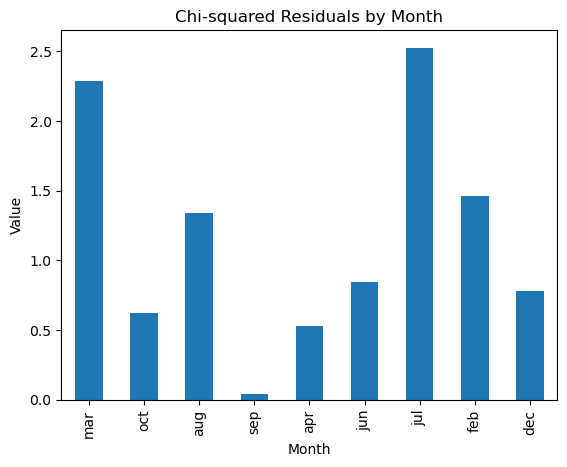

In [16]:
x_vals = []
for mon, val in included:
    resid = val - exp
    print(mon, resid)
    x = math.sqrt(resid**2/exp)
    x_vals.append((mon, x))
ordered = sorted(x_vals, key=lambda x: x[1], reverse=True)
print(ordered)

points = pd.DataFrame(x_vals, columns=["month", "value"])
points.plot(x="month", y="value", kind="bar", title="Chi-squared Residuals by Month", legend=False)
import matplotlib.pyplot as plt
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()